In [25]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [3]:
def party_map(party):
    
    if party == 'democrat':
        
        return 'd_eg'
    
    else:
        
        return 'r_eg'

def fix(quantity):
    
    if len(quantity) < 1:
        
        return 'nan'
    
    elif len(quantity) > 1:
        
        return np.mean(quantity)
    
    else:
        
        return quantity
    
def party_fix(quantity):
    
    if len(quantity) < 1:
        
        party = 'nan'
    
    elif len(quantity) > 1:
        
        party = quantity[0]
    
    else:
        
        party = quantity
        
    if party == 1:
        
        party = 'democrat'
        
    else:
        
        party = 'republican'
        
    return party

In [4]:
raw_house =  pd.read_csv('1976-2018-house.csv', encoding='latin1')

In [26]:
raw_house

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170.0,False,20171005
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170.0,False,20171005
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170.0,False,20171005
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362.0,False,20171005
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362.0,False,20171005
5,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,"William L. """"Bill"""" Dickinson",republican,False,total,90069,156362.0,False,20171005
6,1976,Alabama,AL,1,63,41,US House,3,gen,False,False,Bill Nichols,democrat,False,total,106935,108048.0,False,20171005
7,1976,Alabama,AL,1,63,41,US House,3,gen,False,False,NaN,NaN,True,total,2,108048.0,False,20171005
8,1976,Alabama,AL,1,63,41,US House,3,gen,False,False,Ogburn Gardner,prohibition,False,total,1111,108048.0,False,20171005
9,1976,Alabama,AL,1,63,41,US House,4,gen,False,False,Tom Bevill,democrat,False,total,141490,176022.0,False,20171005


In [16]:
raw_house.party.unique()

array(['democrat', 'republican', nan, 'prohibition', 'national democrat',
       'independent', 'libertarian', 'peace and freedom',
       'american independent', 'u.s. labor', 'socialist workers',
       'american', 'la raza unida', 'indpendent', 'communist',
       'conservative', 'socialist labor',
       'independents for godly government', "people's", 'workers',
       'white power', 'human rights', 'independent american',
       'new majority', 'labor', 'regular democracy', 'pro-life',
       'restoration', 'individual needs center',
       "independent taxpayer's watchdog", 'politicians are crooks',
       'jobs, equality, peace', 'consumer action', 'bring us together',
       'individual americans independence', 'silent majority',
       "people's independent", 'liberal', 'mayflower', 'coequal citizens',
       'revolutionary workers', 'independent conservatives',
       'constitution', 'citizens for haas', 'united states labor',
       'aloha democratic', 'socialist', "worker'

In [5]:
rh = raw_house.copy(deep=True)

rh['candidatevotes'] = rh['candidatevotes'].str.replace(',', '')

rh[['candidatevotes']] = rh[['candidatevotes']].apply(pd.to_numeric)

rh['winner'] = 0

for year in raw_house.year.unique():
        
    for state in raw_house.state.unique():
                
        for district in raw_house[(raw_house.state==state) & (raw_house.year==year)].district.unique():
                                    
            rh.loc[rh[(rh.year==year)&(rh.state==state)&(rh.district==district)].candidatevotes.idxmax(), 'winner'] = 1

In [58]:
rh['wasted_votes'] = 0

for i in range(len(rh)):
    
    total = rh.iloc[i]['totalvotes']
    
    votes = rh.iloc[i]['candidatevotes']
    
    j = rh.iloc[i]['winner']
    
    rh.loc[rh.index==i, 'wasted_votes'] = (1 - j)*votes + j*(votes - total/2 - 1)

In [14]:
"""This is the state-wise Republican-Democrat efficiency gap."""

rd = rh[(rh.party=="democrat") | (rh.party=="republican")]

state_eg =  pd.DataFrame(columns=['year', 'state', 'd_eg', 'r_eg'])

for year in rd.year.unique():
        
    for state in rd.state.unique():
                    
        d_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='democrat'), 'wasted_votes'].sum()
        
        r_wasted_votes = rd.loc[(rd.year==year)&(rd.state==state)&(rd.party=='republican'), 'wasted_votes'].sum()

        total_votes = rh.loc[(rh.year==year)&(rh.state==state), 'totalvotes'].sum()
        
        d_eg = (r_wasted_votes - d_wasted_votes)/total_votes
        
        r_eg = (d_wasted_votes - r_wasted_votes)/total_votes
        
        state_eg = state_eg.append({'year':year, 'state':state, 'd_eg': d_eg, 'r_eg': r_eg}, ignore_index=True)


In [30]:
"""This is the individual district Republican-Democrat efficiency gap."""

district_eg =  pd.DataFrame(columns=['year', 'state', 'district', 'winning_party', 'd_eg', 'r_eg'])

for year in rd.year.unique():
        
    for state in rd.state.unique():
        
        for district in rd.loc[(rd.year==year)&(rd.state==state), 'district'].unique():
            
            winning_party = rd.loc[(rd.year==year)
                                   &(rd.state==state)   
                                   &(rd.district==district)
                                   &(rd.winner==1), 'party']
            
            if len(winning_party) < 1: 
                
                continue
                    
            d_wasted_votes = rd.loc[(rd.year==year)
                                    &(rd.state==state)
                                    &(rd.party=='democrat')
                                    &(rd.district==district), 'wasted_votes'].sum()

            r_wasted_votes = rd.loc[(rd.year==year)
                                    &(rd.state==state)
                                    &(rd.party=='republican')
                                    &(rd.district==district), 'wasted_votes'].sum()

            total_votes = rh.loc[(rh.year==year)
                                 &(rh.state==state)
                                 &(rd.district==district), 'totalvotes'].sum()
            
            if total_votes==0 | 1:
                
                d_eg, r_eg = 0, 0
                
            else:

                d_eg = (r_wasted_votes - d_wasted_votes)/total_votes

                r_eg = (d_wasted_votes - r_wasted_votes)/total_votes

            district_eg = district_eg.append({'year':year, 
                                              'state':state,
                                              'district': district,
                                              'winning_party': winning_party.values[0],
                                              'd_eg': d_eg, 
                                              'r_eg': r_eg}, ignore_index=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [32]:
state_eg.to_csv('state_eg.csv')

district_eg.to_csv('district_eg.csv')

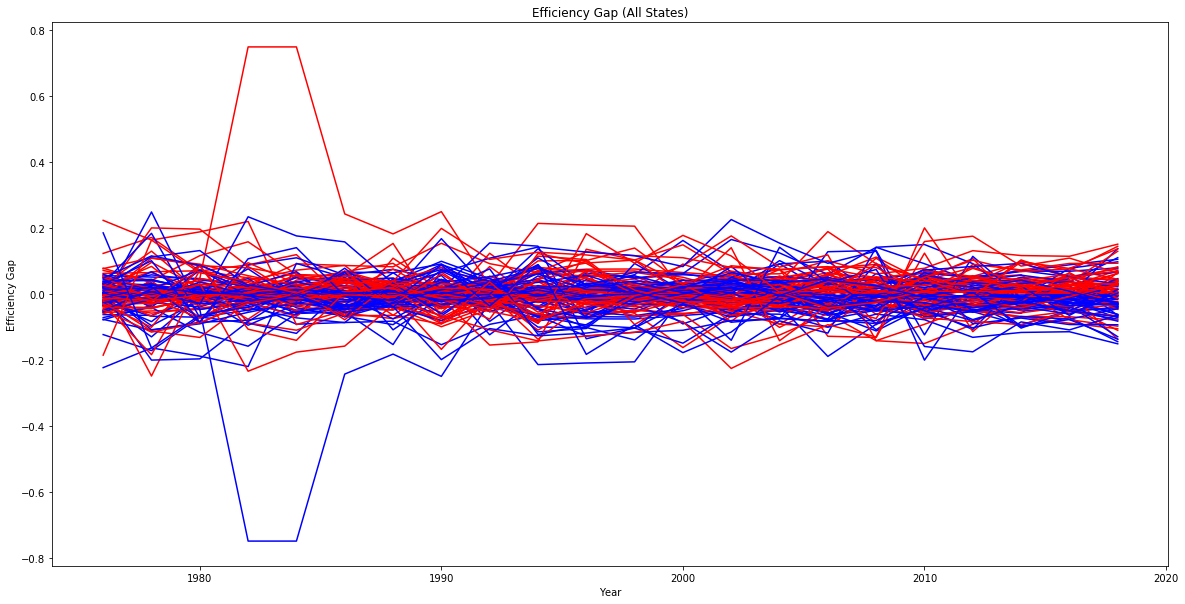

In [71]:
fig = plt.figure(figsize=[20, 10])

for state in eg.state.unique():
    
    sns.lineplot(x=eg.year.unique(), y=eg.loc[eg.state==state, 'r_eg'].values, color='red')
    
    sns.lineplot(x=eg.year.unique(), y=eg.loc[eg.state==state, 'd_eg'].values, color='blue')
    
plt.title("Efficiency Gap (All States)")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()

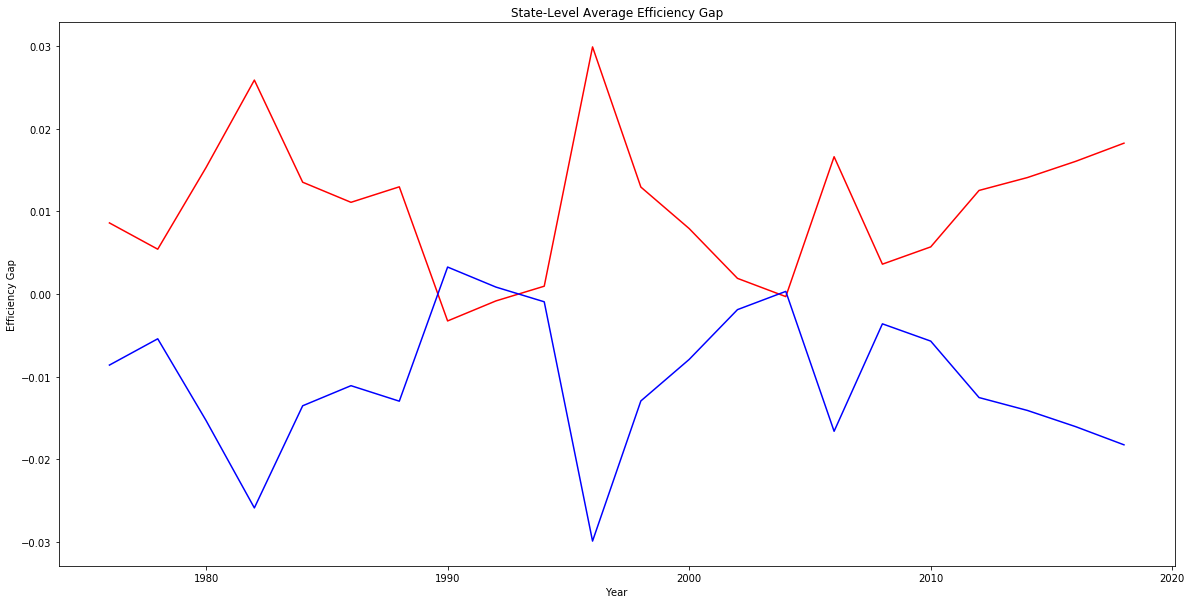

In [61]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=eg.year.unique(), y=eg.groupby(['year']).mean()['r_eg'].values, color='red')

sns.lineplot(x=eg.year.unique(), y=eg.groupby(['year']).mean()['d_eg'].values, color='blue')

plt.title("State-Level Average Efficiency Gap")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()


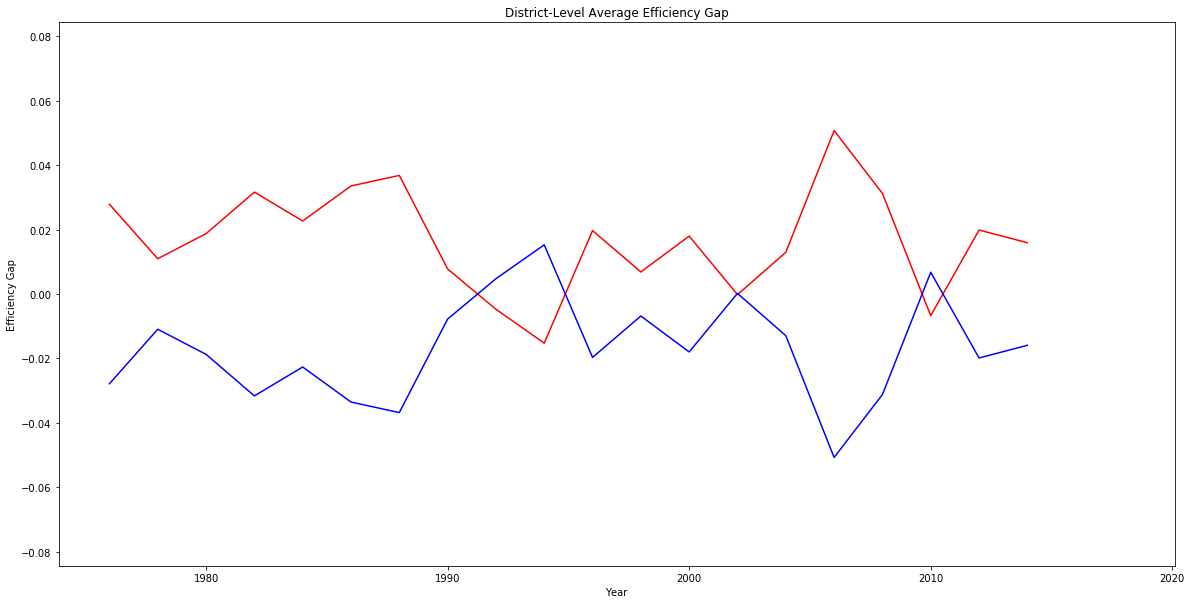

In [60]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=district_eg.year.unique(), y=district_eg.groupby(['year']).mean()['r_eg'].values, color='red')

sns.lineplot(x=district_eg.year.unique(), y=district_eg.groupby(['year']).mean()['d_eg'].values, color='blue')

plt.title("District-Level Average Efficiency Gap")

plt.ylabel("Efficiency Gap")

plt.xlabel("Year")

plt.show()


In [44]:
raw_house_le = pd.read_csv('CELHouse93to115.csv')

In [29]:
raw_house_le

,Numeric counter for order in THOMAS data from 93rd - 110th Congresses,"Legislator name, as given in THOMAS","ICPSR number, according to Poole and Rosenthal",Congress number,Year at start of Congress,Two-letter state code,Congressional district number,1 = Democrat,Year first elected to House,1 = female,Percent vote received to enter this Congress,First-dimension DW-NOMINATE score,Size of House delegation from member's state,1= Speaker,"1 = Chair of subcommittee, according to Almanac of American Politics and Adler/W",Number of substantively significant bills sponsored,Number of substantively significant bills with action in committee,Number of substantively significant bills with action beyond committee,Number of substantively significant bills passed House,Number of substantively significant bills became law,Number of substantive bills sponsored,Number of substantive bills with action in committee,Number of substantive bills with action beyond committee,Number of substantive bills passed House,Number of substantive bills became law,Number of commemorative bills sponsored,Number of commemorative bills with action in committee,Number of commemorative bills with action beyond committee,Number of commemorative bills passed House,Number of commemorative bills became law,1 = African American,1 = Latino/a,votepct squared,"1 = Member of Appropriation, Rules, or Ways and Means","1 = Chair, of standing committee or intellgence/homeland sec according to Stewar",1 = served in state legislature,state_leg * state legislature professionalism,1 = majority party member,1 = Majority party leadership,1 = Minority party leadership,Absolute distance from floor median (DW-NOMINATE),Absolute distance from majority party median (DW-NOMINATE),Total bills sponsored,Total bills with action in committee,Total bills with action beyond committee,Total bills passed House,Total bills became law,Legislative Effectiveness Score (1-5-10),Lagged LES,"Seniority, number of terms served counting current",benchmark,"1 = Below, 2 = Meets, 3 = Exceeds",TotalInParty,RankInParty
0,1.0,"Abdnor, James",14000.0,93,1973,SD,2.0,0,1972,0,55.0,0.228,6.0,0,0,0,0,0,0,0,21,0,0,0,0,1,0,0,0,0,0,0,3025.0,0.0,0,1.0,0.104,0,0.0,0.0,0.2750,0.5475,22,0,0,0,0,0.109570,NaN,1,0.271341,1,197,132
1,2.0,"Abzug, Bella",13001.0,93,1973,NY,20.0,1,1970,1,56.0,-0.687,39.0,0,0,0,0,0,0,0,128,0,0,0,0,8,1,1,1,1,0,0,3136.0,0.0,0,0.0,0.000,1,0.0,0.0,0.6400,0.3675,136,1,1,1,1,0.762431,NaN,2,0.510812,2,248,119
2,3.0,"Adams, Brock",10700.0,93,1973,WA,7.0,1,1964,0,85.0,-0.361,7.0,0,1,2,1,1,1,0,33,1,1,1,1,2,0,0,0,0,0,0,7225.0,0.0,0,0.0,0.000,1,0.0,0.0,0.3140,0.0415,37,2,2,2,1,1.236478,NaN,5,1.530341,2,248,88
3,4.0,"Addabbo, Joseph",10500.0,93,1973,NY,7.0,1,1960,0,75.0,-0.400,39.0,0,1,0,0,0,0,0,28,0,0,0,0,10,0,0,0,0,0,0,5625.0,1.0,0,0.0,0.000,1,0.0,0.0,0.3530,0.0805,38,0,0,0,0,0.155052,NaN,7,1.584493,1,248,197
4,5.0,"Albert, Carl",NaN,93,1973,OK,3.0,1,1946,0,93.0,NaN,6.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8649.0,0.0,0,0.0,0.000,1,0.0,0.0,NaN,NaN,1,0,0,0,0,0.001034,NaN,14,0.623325,1,248,247
5,6.0,"Alexander, Bill",12000.0,93,1973,AR,1.0,1,1968,0,100.0,-0.281,4.0,0,1,2,2,2,1,1,51,1,1,1,0,0,0,0,0,0,0,0,10000.0,0.0,0,0.0,0.000,1,0.0,0.0,0.2340,0.0385,53,3,3,2,1,1.875051,NaN,3,1.476190,2,248,64
6,8.0,"Anderson, Glenn",12001.0,93,1973,CA,35.0,1,1968,0,75.0,-0.293,43.0,0,0,1,0,0,0,0,84,0,0,0,0,2,0,0,0,0,0,0,5625.0,0.0,0,1.0,0.526,1,0.0,0.0,0.2460,0.0265,87,0,0,0,0,0.446551,NaN,3,0.537888,2,248,147
7,7.0,"Anderson, John",10501.0,93,1973,IL,16.0,0,1960,0,72.0,0.102,24.0,0,0,1,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0,5184.0,1.0,0,0.0,0.000,0,0.0,1.0,0.1490,0.4215,55,0,0,0,0,0.289431,NaN,7,0.433795,2,197,67
8,9.0,"Andrews, Ike",14001.0,93,1973,NC,4.0,1,1972,0,50.0,-0.098,11.0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,2500.0,0.0,0,1.0,0.190,1,0.0,0.0,0.0510,0.2215,17,0,0,0,0,0.087863,NaN,1,0.483737,1,248,218
9,10.0,"Andrews, Mark",10569.0,93,1973,ND,1.0,0,1963,0,73.0,0.106,1.0,0,0,0,0,0,0,0,20,0,0,0,0,3,0,0,0,0,0,0,5329.0,1.0,0,

In [45]:
house_le = raw_house_le[['Year at start of Congress', 'Two-letter state code', 'Congressional district number', '1 = Democrat', 'benchmark', 'Legislative Effectiveness Score (1-5-10)', 'TotalInParty', 'RankInParty']]

house_le = house_le.rename(columns={'Year at start of Congress':'year', 'Two-letter state code':'state_code', 'Congressional district number':'district', '1 = Democrat':'democrat', 'Legislative Effectiveness Score (1-5-10)':'le', 'TotalInParty':'party_total', 'RankInParty':'party_rank'})

In [40]:
house_le['relative_le'] = house_le['benchmark'] - house_le['le']

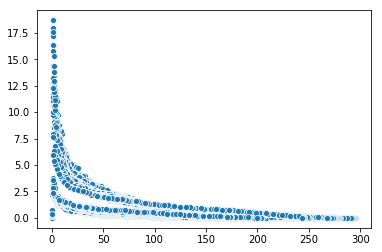

In [45]:
sns.scatterplot(x=house_le.party_rank.values, y=house_le['le'].values)

plt.show()

In [47]:
test = house_le['le'].values/(house_le.party_rank.values + 1)

sns.scatterplot()

In [41]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [10]:
for i in range(len(eg)):
    
    eg.loc[eg.index==i, 'state_code'] = us_state_abbrev[eg['state'].iloc[i]]

In [42]:
for i in range(len(district_eg)):
    
    district_eg.loc[district_eg.index==i, 'state_code'] = us_state_abbrev[district_eg['state'].iloc[i]]

In [11]:
"""Uncorrected legislative effectiveness"""

for i in range(len(eg)):
    
    year = eg.year.iloc[i]
    
    state_code = eg.state_code.iloc[i]
    
    le = house_le.loc[(house_le.year==(year + 1))&(house_le.state_code==state_code), 'le'].mean()
        
    eg.loc[eg.index==i, 'le'] = le
    

In [46]:
"""Uncorrected district-level legislative effectiveness"""

for i in range(len(district_eg)):
    
    year = district_eg.year.iloc[i]
    
    state_code = district_eg.state_code.iloc[i]
    
    district = district_eg.district.iloc[i]
    
    le = house_le.loc[(house_le.year==(year + 1))
                      &(house_le.state_code==state_code)
                      &(house_le.district==district), 'le'].mean()
        
    district_eg.loc[district_eg.index==i, 'le'] = le
    

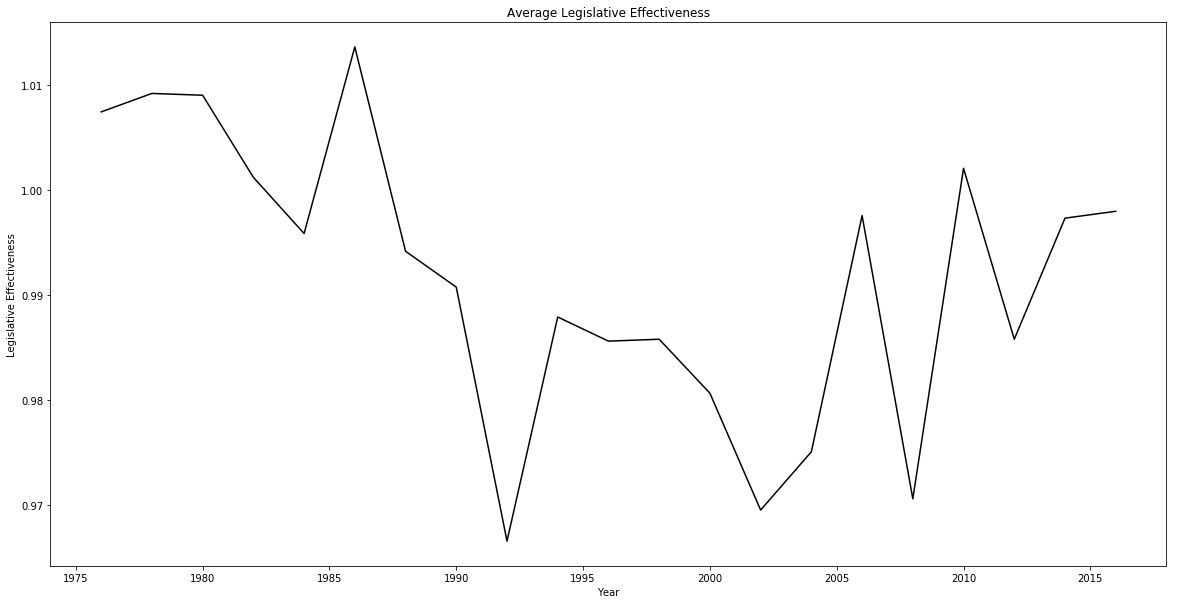

In [57]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=np.sort(district_eg.year.unique()), y=district_eg.groupby(['year']).mean()['le'].values, color='black')

plt.title("Average Legislative Effectiveness")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Year")

plt.show()

In [32]:
"""Adjusted legislative effectiveness"""

for i in range(len(eg)):
    
    year = eg.year.iloc[i]
    
    state_code = eg.state_code.iloc[i]
    
    relative_le = house_le.loc[(house_le.year==(year + 1))&(house_le.state_code==state_code), 'relative_le'].mean()
        
    eg.loc[eg.index==i, 'relative_le'] = relative_le
    

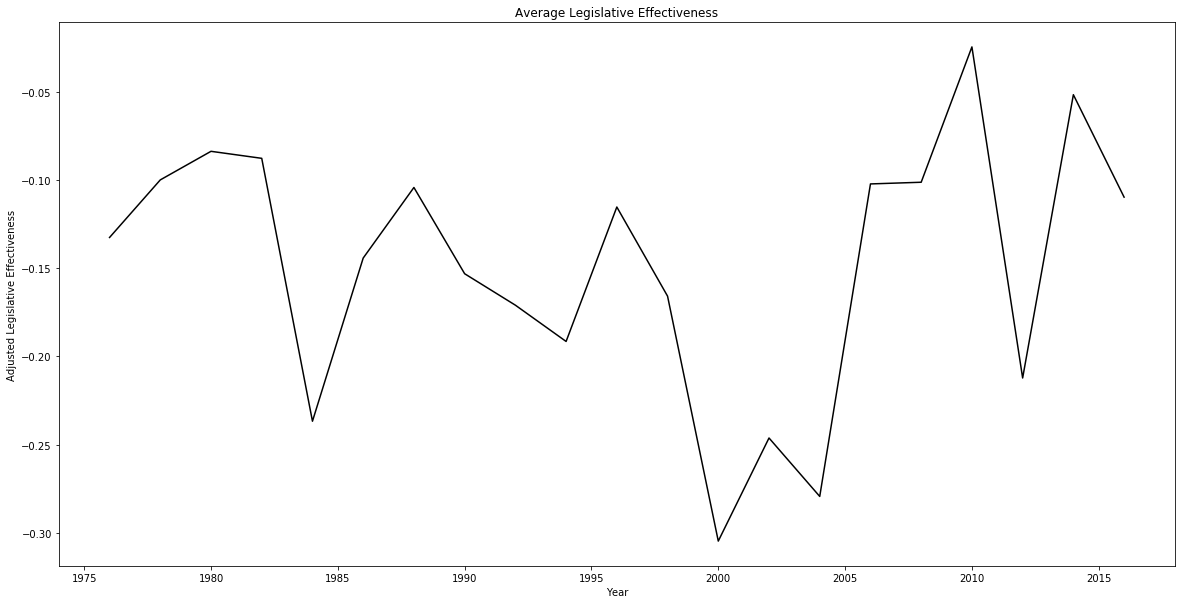

In [33]:
fig = plt.figure(figsize=[20, 10])

sns.lineplot(x=eg.year.unique(), y=eg.groupby(['year']).mean()['relative_le'].values, color='black')

plt.title("Average Legislative Effectiveness")

plt.ylabel("Adjusted Legislative Effectiveness")

plt.xlabel("Year")

plt.show()

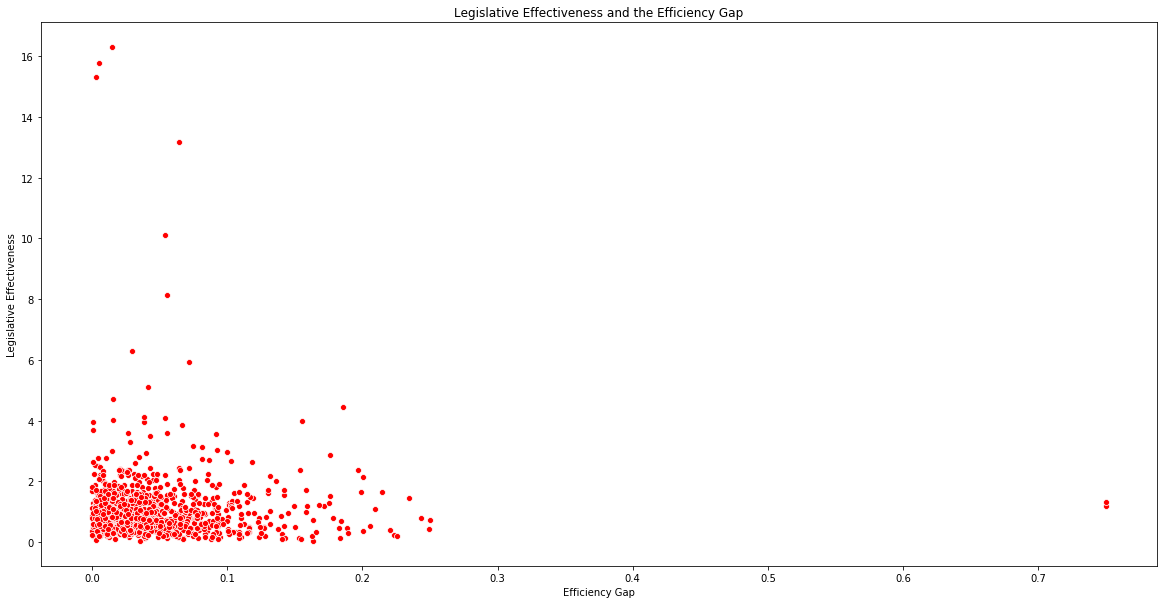

In [136]:
fig = plt.figure(figsize=[20, 10])

sns.scatterplot(x=abs(eg['r_eg'].values), y=eg['le'].values, color='red')

plt.title("Legislative Effectiveness and the Efficiency Gap")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Efficiency Gap")

plt.show()

In [56]:
full_eg_le = rd[rd.winner==1].copy(deep=True)

for i in range(len(full_eg_le)):
    
    year = full_eg_le.year.iloc[i]
    
    state = full_eg_le.state.iloc[i]
    
    state_code = full_eg_le.state_po.iloc[i]
    
    district = full_eg_le.district.iloc[i]
        
    party_eg = party_map(full_eg_le.party.iloc[i])
        
    egap = eg.loc[(eg.year==year)&(eg.state==state), party_eg].values
    
    leff = fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'le'].values)
            
    party = party_fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'democrat'].values)
    
    party_rank = fix(house_le.loc[(house_le.year==year + 1)&(house_le.state_code==state_code)&(house_le.district==district), 'party_rank'].values)

    full_eg_le.loc[full_eg_le.index==i, 'party'] = party
    
    full_eg_le.loc[full_eg_le.index==i, 'eg'] = egap
    
    full_eg_le.loc[full_eg_le.index==i, 'le'] = leff
        
    full_eg_le.loc[full_eg_le.index==i, 'party_rank'] = party_rank


In [24]:
full_eg_le.to_csv('full_eg_le.csv')

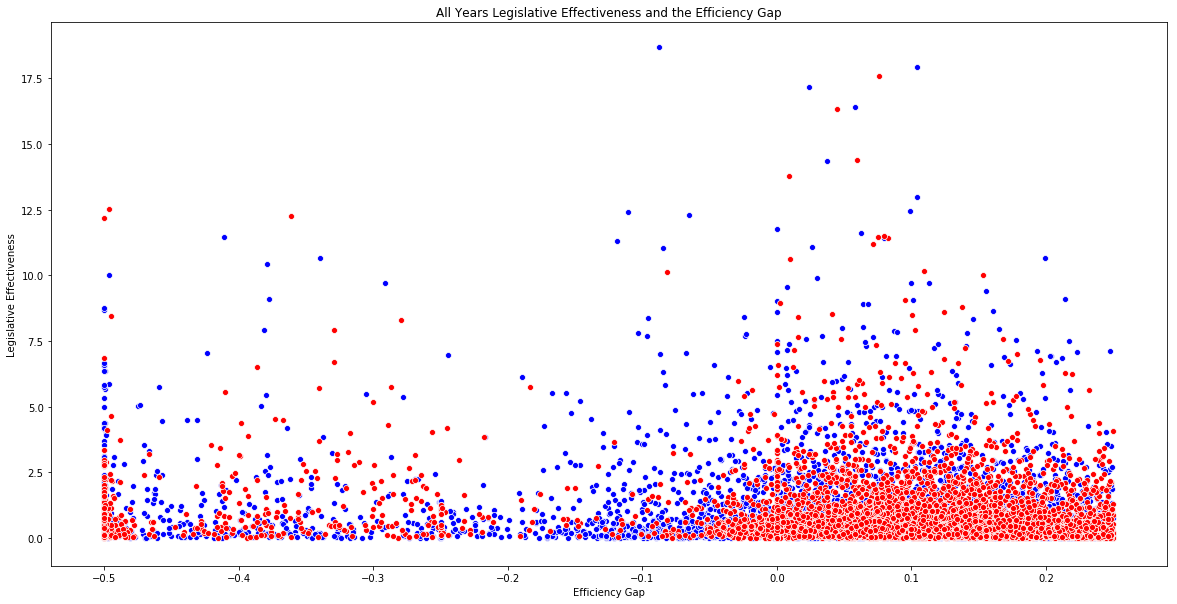

In [54]:
fig = plt.figure(figsize=[20, 10])

d = district_eg[district_eg.winning_party=='democrat']

r = district_eg[district_eg.winning_party=='republican']

sns.scatterplot(x=d.d_eg.values, y=d['le'].values, color='blue')
sns.scatterplot(x=r.r_eg.values, y=r['le'].values, color='red')


plt.title("Legislative Effectiveness and the Efficiency Gap")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Efficiency Gap")

plt.show()

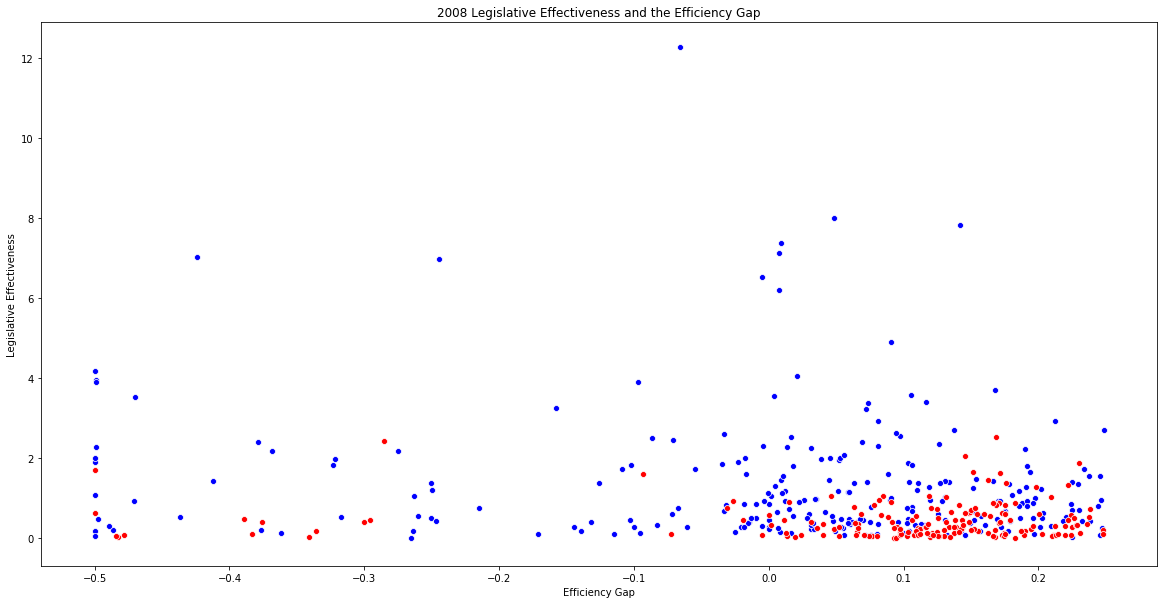

In [53]:
fig = plt.figure(figsize=[20, 10])

year = 2008

d = district_eg[(district_eg.winning_party=='democrat')&(district_eg.year==year)]

r = district_eg[(district_eg.winning_party=='republican')&(district_eg.year==year)]

sns.scatterplot(x=d.d_eg.values, y=d['le'].values, color='blue')
sns.scatterplot(x=r.r_eg.values, y=r['le'].values, color='red')


plt.title("2008 Legislative Effectiveness and the Efficiency Gap")

plt.ylabel("Legislative Effectiveness")

plt.xlabel("Efficiency Gap")

plt.show()